# Cargar Librerias necesarias 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression

# Cargar Datos

In [2]:
raw_train = pd.read_csv('data/train.csv')
raw_train.head(5)

,Unnamed: 0,serial_no,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Admission Points
0,0,479,327,113,4,4.00,2.77,8.88,1,84.47
1,1,446,301,92,1,1.85,1.50,7.71,0,45.08
2,2,336,297,100,1,2.41,1.59,7.89,0,47.42
3,3,20,303,98,3,3.50,3.00,8.50,0,62.00
4,4,432,320,94,2,1.38,3.50,8.78,1,73.00


In [3]:
raw_test = pd.read_csv('data/test.csv')
raw_test.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,117,299,102,3,4.0,3.5,8.62,0
1,49,321,110,3,3.5,5.0,8.85,1
2,94,301,97,2,3.0,3.0,7.88,1
3,108,338,117,4,3.5,4.5,9.46,1
4,327,299,100,3,2.0,2.0,8.02,0


# Perfilamiento y Entendimiento de los Datos

In [4]:
raw_train = raw_train.dropna()
raw_test = raw_test.dropna()

In [5]:
p = raw_train.shape[0]
print(raw_train.isnull().sum())
raw_train = raw_train.drop_duplicates()
print("Registros duplicados:",p-raw_train.shape[0])

Unnamed: 0           0
serial_no            0
gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor                  0
cgpa                 0
research             0
Admission Points     0
dtype: int64
Registros duplicados: 0


In [6]:
p = raw_test.shape[0]
print(raw_test.isnull().sum())
raw_test = raw_test.drop_duplicates()
print("Registros duplicados:",p-raw_test.shape[0])

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64
Registros duplicados: 15


# Eleccion de variables lineales.

A continuación se muestra el proceso de selección de variables, sin emabrgo ya sabemos cuales variables se escogieron debido a que el procedimiento se realizó en el laboratorio 3

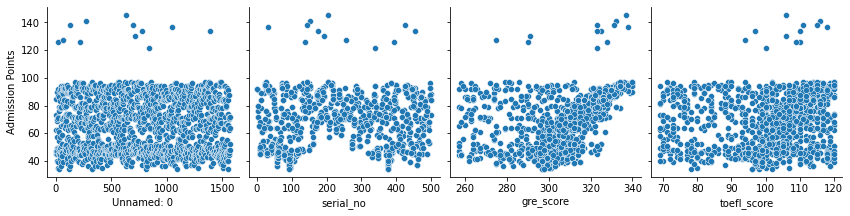

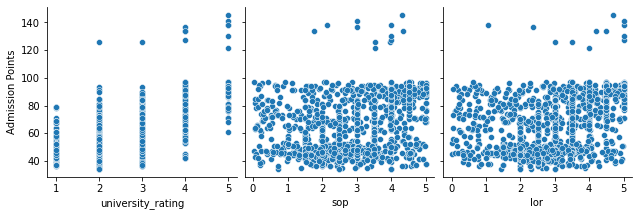

In [8]:
sns.pairplot(raw_train, height=3, y_vars = 'Admission Points', x_vars = raw_train.columns[0:4], kind='scatter')
sns.pairplot(raw_train, height=3, y_vars = 'Admission Points', x_vars = raw_train.columns[4:7], kind='scatter')

                   Unnamed: 0  serial_no  gre_score  toefl_score  \
Unnamed: 0           1.000000  -0.026731  -0.023332    -0.013522   
serial_no           -0.026731   1.000000   0.005242    -0.007735   
gre_score           -0.023332   0.005242   1.000000     0.114754   
toefl_score         -0.013522  -0.007735   0.114754     1.000000   
university_rating   -0.033018  -0.014229   0.362333     0.188545   
sop                 -0.041394  -0.074235   0.197268     0.107246   
lor                 -0.019587   0.043698   0.217160     0.088629   
cgpa                -0.001506  -0.041366   0.340581     0.151689   
research            -0.023830  -0.045443   0.371511     0.142938   
Admission Points    -0.032540   0.054952   0.452405     0.222330   

                   university_rating       sop      lor       cgpa  research  \
Unnamed: 0                 -0.033018 -0.041394 -0.019587 -0.001506 -0.023830   
serial_no                  -0.014229 -0.074235  0.043698 -0.041366 -0.045443   
gre_score  

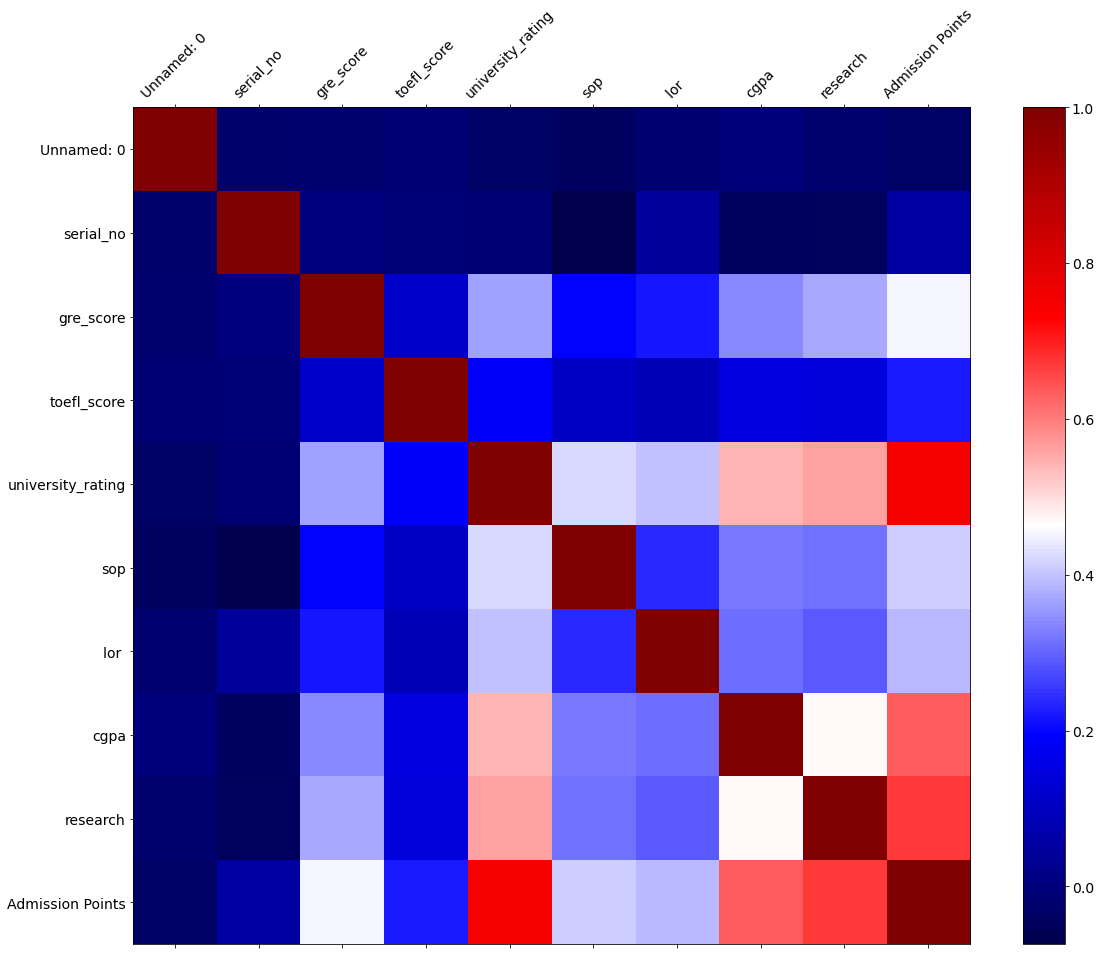

In [9]:
#IDENTIFICACION DE CORRELACIONES
f = plt.figure(figsize=(19, 15))
plt.matshow(raw_train.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(raw_train.select_dtypes(['number']).shape[1]), raw_train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(raw_train.select_dtypes(['number']).shape[1]), raw_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)
print(raw_train.corr())

# Pipeline

In [15]:
## Seleccionamos las columnas y con el transformador aseguramos que solo esas puedan pasar. 
selected_cols = ["gre_score", "toefl_score","cgpa","university_rating"]
num_attribs = ["gre_score", "toefl_score","cgpa"]
word_attribs = ["university_rating"]

In [16]:
number_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

word_pipeline = Pipeline([
        ('ordinal_encoder', OrdinalEncoder()),
        ('one_hot_encoder', OneHotEncoder()),
    ])

In [17]:
selected_cols = ["gre_score", "toefl_score","cgpa","university_rating"]
num_attribs = ["gre_score", "toefl_score","cgpa"]
#word_attribs = ["University Rating"]


full_pipeline = ColumnTransformer( transformers=[
    ("number_pipeline", number_pipeline, num_attribs),
    ("word_pipeline", word_pipeline, word_attribs),
    ])

In [18]:
X = raw_train.drop('Admission Points', axis = 1)
y = raw_train['Admission Points']

In [19]:
# PIPELINE
pipeline = Pipeline(steps=[("full_pipeline", full_pipeline), ('model', LinearRegression())])

pipeline.fit(X,y)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('number_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['gre_score', 'toefl_score',
                                                   'cgpa']),
                                                 ('word_pipeline',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())

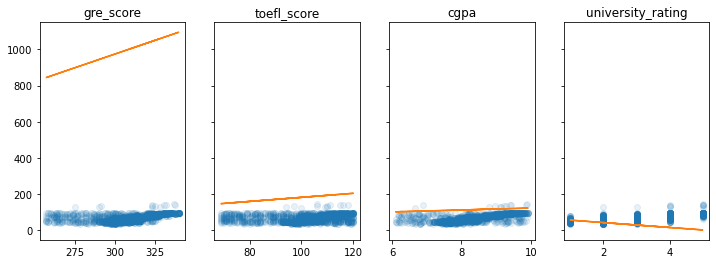

In [20]:
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [21]:
pipeline.score(X,y)

0.665979580818342

In [22]:
y_predicted = pipeline.predict(X)

In [23]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error

# Explained Variance Score

Sigue la funcion: $$ explained\_variance\_score(y, y_{estimado}) =  1 - \frac{Var(y - y_{estimado})}{Var(y)}  $$

Se buscan valores cercanos a 1 son deseados, ya que si restamos $y$ con $y_{estimado}$ y son parecidos (que es lo que se espera) el numerador dara cerca a cero, lo que generara que la funcion sea cercana a uno, el divisior esta solo para volver el valor porcentual. 

In [24]:
explained_variance_score(y, y_predicted)

0.6659795808183419

# Max_error

Como dice el nombre, esta funcion retorna el error maximo recidual entre $y_{estimado}$ y $y$. 

In [25]:
max_error(y, y_predicted)

60.5787765363722

# mean_absolute_error (MAE)

Sigue la formula: $$MAE = \frac{1}{n}\sum _{i = 1}^{n}  |y_i - y_{estimado_i}|$$

Basicamente nos da el primedio de errores cometidos, como podemos ver el resultado es 8.3 debido a que el modelo esta en una escala donde el mayor es 101.96 y el menor es 31.55 (como se puede observar abajo), por lo tanto un error promedio de 8 puntos parece no ser demasiado grande. 

In [26]:
print(max(y), max(y_predicted))
print(min(y), min(y_predicted))

145.5 101.96318667600565
34.0 31.551494929964058


In [27]:
mean_absolute_error(y, y_predicted)

8.399470439985851

## Lineas Refression poly

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[1.00000e+00, 0.00000e+00, 4.79000e+02, ..., 7.88544e+01,
        8.88000e+00, 1.00000e+00],
       [1.00000e+00, 1.00000e+00, 4.46000e+02, ..., 5.94441e+01,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.00000e+00, 3.36000e+02, ..., 6.22521e+01,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 1.56600e+03, 1.49000e+02, ..., 4.39569e+01,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.56700e+03, 1.02000e+02, ..., 7.00569e+01,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.56800e+03, 3.71000e+02, ..., 6.78976e+01,
        0.00000e+00, 0.00000e+00]])

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = Pipeline([("full_pipeline", full_pipeline), ('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
                  
model.fit(X, y)

# print out regression coefficients
print(model.named_steps['linear'].coef_)    
print(model.named_steps['linear'].intercept_)  

[45.18968141  5.24627294  1.09149358  4.07090111  2.86390794  5.27477351
  8.42594916 12.00866731 16.61638349  3.21141047  0.26870321 -1.64921083
  1.32384978  3.46970126  1.39762081  0.23039112 -1.17529003  0.82201667
 -0.2963688  -0.33240811  0.7489106   0.64955893  0.36557249 -0.34014032
  1.71216281 -0.70328085  0.88248724  3.85541003  2.54170346 -2.50541877
  2.86390794  0.          0.          0.          0.          5.27477351
  0.          0.          0.          8.42594916  0.          0.
 12.00866731  0.         16.61638349]
0.0


In [31]:
y_predicted = model.predict(X)

In [32]:
explained_variance_score(y, y_predicted)

0.7341181181663765

In [33]:
model.score(X,y)

0.7341181181663765

In [34]:
max_error(y, y_predicted)

55.68252022048607

In [35]:
print(max(y), max(y_predicted))
print(min(y), min(y_predicted))

145.5 108.9041313478581
34.0 40.40617449761575


In [36]:
mean_absolute_error(y, y_predicted)

7.326000610712954

In [37]:
## Queremos probar varios polinomios para saber cual puede ser mejor.
val = 0
indice = -1

for i in range(1,10):
    poly = PolynomialFeatures(degree=i)
    poly.fit_transform(X)
    model = Pipeline([("full_pipeline", full_pipeline), ('poly', PolynomialFeatures(degree=i)),
                  ('linear', LinearRegression(fit_intercept=False))])
    model.fit(X, y)
    y_predicted = model.predict(X)
    valContest = explained_variance_score(y, y_predicted)
    if val < valContest:
        val = valContest
        indice = i
    print(i)
print(val, indice)

1
2
3
4
5
6
7
8
9
0.9324310697741511 9


In [38]:
val = 0.9324310697741511
indice = 9

for i in range(10,16):
    poly = PolynomialFeatures(degree=i)
    poly.fit_transform(X)
    model = Pipeline([("full_pipeline", full_pipeline), ('poly', PolynomialFeatures(degree=i)),
                  ('linear', LinearRegression(fit_intercept=False))])
    model.fit(X, y)
    y_predicted = model.predict(X)
    valContest = explained_variance_score(y, y_predicted)
    if val < valContest:
        val = valContest
        indice = i
    print(i, val, indice)

10 0.9591661786835913 10
11 0.9822639767266135 11
12 0.9975792754289767 12
13 0.9975792754289767 12
14 0.9975792754289767 12
15 0.9975792754289767 12


## Revisamos la 12

In [39]:
poly = PolynomialFeatures(degree=12)
poly.fit_transform(X)
model = Pipeline([("full_pipeline", full_pipeline), ('poly', PolynomialFeatures(degree=12)),
                  ('linear', LinearRegression(fit_intercept=False))])
model.fit(X, y)
y_predicted = model.predict(X)
explained_variance_score(y, y_predicted)

0.9975792754289767

In [40]:
max_error(y, y_predicted)

23.00001072883606

In [41]:
from sklearn.metrics import mean_absolute_error, r2_score
mean_absolute_error(y, y_predicted)

0.05410019745728802

In [42]:
r2_score(y, y_predicted)

0.9975792754289766

In [43]:
print(X)

      Unnamed: 0  serial_no  gre_score  toefl_score  university_rating   sop  \
0              0        479        327          113                  4  4.00   
1              1        446        301           92                  1  1.85   
2              2        336        297          100                  1  2.41   
3              3         20        303           98                  3  3.50   
4              4        432        320           94                  2  1.38   
...          ...        ...        ...          ...                ...   ...   
1564        1564        114        298           99                  2  3.00   
1565        1565        274        312           77                  1  1.00   
1566        1566        149        292           99                  1  2.65   
1567        1567        102        312          105                  2  4.41   
1568        1568        371        310           71                  2  2.50   

      lor   cgpa  research  
0     2.77